
**CLASSIFICATION LIBRARIES**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
df1= pd.read_csv('/content/ravdess_features_sandro.csv', skipinitialspace=True)
#sorry sandro per sbaglio ho modificato il percorso

In [ ]:
df1.shape
df1.info()
df1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   sex                  2452 non-null   object 
 6   frame_width          2452 non-null   int64  
 7   length_ms            2452 non-null   int64  
 8   zero_crossings_sum   2452 non-null   int64  
 9   mfcc_mean            2452 non-null   float64
 10  mfcc_std             2452 non-null   float64
 11  mfcc_min             2452 non-null   float64
 12  mfcc_max             2452 non-null   float64
 13  sc_mean              2452 non-null   float64
 14  sc_std               2452 non-null   float64
 15  sc_min               2452 non-null   f

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,2,3737,16995,-33.485947,...,0.335533,0.000000,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,Dogs are sitting by the door,1st,F,2,3904,13906,-29.502108,...,0.352380,0.000000,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,song,happy,strong,Dogs are sitting by the door,2nd,F,2,4671,18723,-30.532463,...,0.352270,0.000000,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,Kids are talking by the door,1st,F,2,3637,11617,-36.059555,...,0.360552,0.000000,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,Dogs are sitting by the door,2nd,F,2,4404,15137,-31.405996,...,0.350655,0.000000,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872
5,speech,fearful,normal,Dogs are sitting by the door,2nd,F,2,3570,12143,-30.500889,...,0.345256,0.000000,-1.098179,0.576157,2.519818e-07,0.015296,-0.122467,0.106171,12.775898,0.028186
6,speech,angry,normal,Dogs are sitting by the door,1st,F,2,3770,14239,-30.177172,...,0.346839,0.000000,-1.425898,0.027192,-1.571576e-07,0.013860,-0.132965,0.148987,14.273623,0.011188
7,speech,neutral,normal,Dogs are sitting by the door,2nd,F,2,3437,11147,-36.048576,...,0.328248,0.000000,-1.307958,0.056840,-3.640687e-07,0.003526,-0.027222,0.040894,11.289926,0.211353
8,speech,calm,normal,Dogs are sitting by the door,1st,F,2,3770,15293,-33.899364,...,0.328253,0.000000,-1.262960,-0.216020,-8.802126e-07,0.005091,-0.029510,0.025879,5.259552,-0.964433
9,song,sad,strong,Dogs are sitting by the door,2nd,F,2,4371,13024,-29.462296,...,0.367643,0.000185,-1.544716,-0.141990,2.485711e-05,0.039338,-0.286011,0.331696,11.379089,0.475098


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

##### Decision Tree Visualization ###
from sklearn import tree # export_graphviz() method
import pydotplus # viz stuff
from IPython.display import Image # viz stuff
####################################

######## Evaluation #######
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Optional: baseline comparison
from sklearn.dummy import DummyClassifier
###########################

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# cross-validation
from sklearn.model_selection import cross_val_score

#trasformazione variabili
from sklearn.preprocessing import LabelEncoder




### Trasformazioni

In [ ]:
#emotional intensity, converto valore normal=0 e strong=1
le = LabelEncoder()

df1['emotional_intensity'] = le.fit_transform(df1['emotional_intensity'])

df1['emotional_intensity'].values[:5]


array([0, 0, 1, 0, 1])

In [ ]:
#sex, converto valore F=0 e M=1

le = LabelEncoder()

df1['sex'] = le.fit_transform(df1['sex'])

df1['sex'].values[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#repetition, converto valore 1th=0 e 2th=1
le = LabelEncoder()

df1['repetition'] = le.fit_transform(df1['repetition'])

df1['repetition'].values[:5]

array([1, 0, 1, 0, 1])

In [ ]:
#statement, converto valore dogs are sitting=0 e Kids are talking=1
le = LabelEncoder()

df1['statement'] = le.fit_transform(df1['statement'])

df1['statement'].values[:5]

array([0, 0, 0, 1, 0])

In [ ]:
#vocal_channel, converto speech=1 e song=0
le = LabelEncoder()

df1['vocal_channel'] = le.fit_transform(df1['vocal_channel'])

df1['vocal_channel'].values[:5]

array([1, 1, 0, 1, 0])

In [ ]:
df1 = pd.concat(  [df1, pd.get_dummies(df1['emotion'], prefix='emotion')], axis=1 )
df1 = df1.drop('emotion', axis=1)

In [ ]:
df1.iloc[:]

,vocal_channel,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,mfcc_std,...,kur,skew,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,0,1,0,2,3737,16995,-33.485947,134.654860,...,9.406061,0.273153,0,0,0,1,0,0,0,0
1,1,0,0,0,0,2,3904,13906,-29.502108,130.485630,...,19.564187,0.292157,1,0,0,0,0,0,0,0
2,0,1,0,1,0,2,4671,18723,-30.532463,126.577110,...,4.881241,0.302659,0,0,0,0,1,0,0,0
3,1,0,1,0,0,2,3637,11617,-36.059555,159.725160,...,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,0,1,0,1,0,2,4404,15137,-31.405996,122.125824,...,7.485109,0.414872,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,1,1,1,0,1,2,4605,9871,-30.225578,158.845500,...,9.551363,0.759247,0,1,0,0,0,0,0,0
2448,1,0,0,0,1,2,4171,8963,-31.160332,157.499700,...,22.517991,1.073633,0,1,0,0,0,0,0,0
2449,0,1,0,1,1,2,5239,9765,-26.135280,138.133210,...,4.964319,-0.005821,0,0,0,0,0,0,1,0
2450,1,0,1,0,1,2,3737,9716,-28.242815,159.943400,...,13.855588,-0.110966,0,0,0,0,0,0,0,1


### vocal_channel

In [ ]:
#Hold out
attributes = [col for col in df1.columns if col != 'vocal_channel']
X = df1[attributes].values
y = df1['vocal_chann


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#test size ci chiede info sulla grandezza del test set, è 0.3 perchè vogliamo riservargli il trenta percento

In [ ]:
len(df1), X_train.shape[0], X_test.shape[0], y_test.shape[0]

(2452, 1716, 736, 736)

In [ ]:
df1.shape, X_train.shape, X_test.shape

((2452, 37), (1716, 36), (736, 36))

In [ ]:
clf = DecisionTreeClassifier(criterion='gini',
                             max_depth = None ,
                             min_samples_split= 20,
                             min_samples_leaf= 5,
                            )

clf.fit(X_train, y_train)

#inizio con min_sample_split uguale a 10, lo cambio a 20 a seguito del consiglio di gridsearch

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=20)

In [ ]:
clf.feature_importances_


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.06382389e-01, 9.60915402e-03, 1.25858613e-03,
       9.04765710e-03, 0.00000000e+00, 3.65385681e-03, 5.74201721e-02,
       2.58279028e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.62513374e-03, 8.40124392e-03, 1.28056104e-02, 0.00000000e+00,
       4.78908780e-03, 1.81935868e-03, 4.31736703e-04, 0.00000000e+00,
       0.00000000e+00, 1.16195708e-02, 2.64486467e-02, 7.11739854e-04,
       0.00000000e+00, 0.00000000e+00, 3.50871325e-02, 2.30613389e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [ ]:
imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(attributes)}
imp_dict

{'emotional_intensity': 0.0,
 'statement': 0.0,
 'repetition': 0.0,
 'sex': 0.0,
 'frame_width': 0.0,
 'length_ms': 0.8063823885639093,
 'zero_crossings_sum': 0.00960915401637014,
 'mfcc_mean': 0.001258586134581495,
 'mfcc_std': 0.009047657104864793,
 'mfcc_min': 0.0,
 'mfcc_max': 0.003653856805831767,
 'sc_mean': 0.05742017207628096,
 'sc_std': 0.0025827902807226645,
 'sc_min': 0.0,
 'sc_max': 0.0,
 'sc_kur': 0.0,
 'sc_skew': 0.005625133736315424,
 'stft_mean': 0.008401243920637874,
 'stft_std': 0.012805610397490433,
 'stft_min': 0.0,
 'stft_kur': 0.004789087795380465,
 'stft_skew': 0.0018193586806515116,
 'mean': 0.00043173670278952493,
 'std': 0.0,
 'min': 0.0,
 'max': 0.011619570829852596,
 'kur': 0.02644864672927462,
 'skew': 0.0007117398542363539,
 'emotion_angry': 0.0,
 'emotion_calm': 0.0,
 'emotion_disgust': 0.03508713247588952,
 'emotion_fearful': 0.00230613389492055,
 'emotion_happy': 0.0,
 'emotion_neutral': 0.0,
 'emotion_sad': 0.0,
 'emotion_surprised': 0.0}

In [ ]:
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}

{'length_ms': 0.8063823885639093,
 'sc_mean': 0.05742017207628096,
 'emotion_disgust': 0.03508713247588952,
 'kur': 0.02644864672927462,
 'stft_std': 0.012805610397490433,
 'max': 0.011619570829852596,
 'zero_crossings_sum': 0.00960915401637014,
 'mfcc_std': 0.009047657104864793,
 'stft_mean': 0.008401243920637874,
 'sc_skew': 0.005625133736315424,
 'stft_kur': 0.004789087795380465,
 'mfcc_max': 0.003653856805831767,
 'sc_std': 0.0025827902807226645,
 'emotion_fearful': 0.00230613389492055,
 'stft_skew': 0.0018193586806515116,
 'mfcc_mean': 0.001258586134581495,
 'skew': 0.0007117398542363539,
 'mean': 0.00043173670278952493,
 'emotional_intensity': 0.0,
 'statement': 0.0,
 'repetition': 0.0,
 'sex': 0.0,
 'frame_width': 0.0,
 'mfcc_min': 0.0,
 'sc_min': 0.0,
 'sc_max': 0.0,
 'sc_kur': 0.0,
 'stft_min': 0.0,
 'std': 0.0,
 'min': 0.0,
 'emotion_angry': 0.0,
 'emotion_calm': 0.0,
 'emotion_happy': 0.0,
 'emotion_neutral': 0.0,
 'emotion_sad': 0.0,
 'emotion_surprised': 0.0}

In [ ]:
clf.classes_

array([0, 1])

CPU times: user 725 ms, sys: 17.6 ms, total: 742 ms
Wall time: 1.08 s


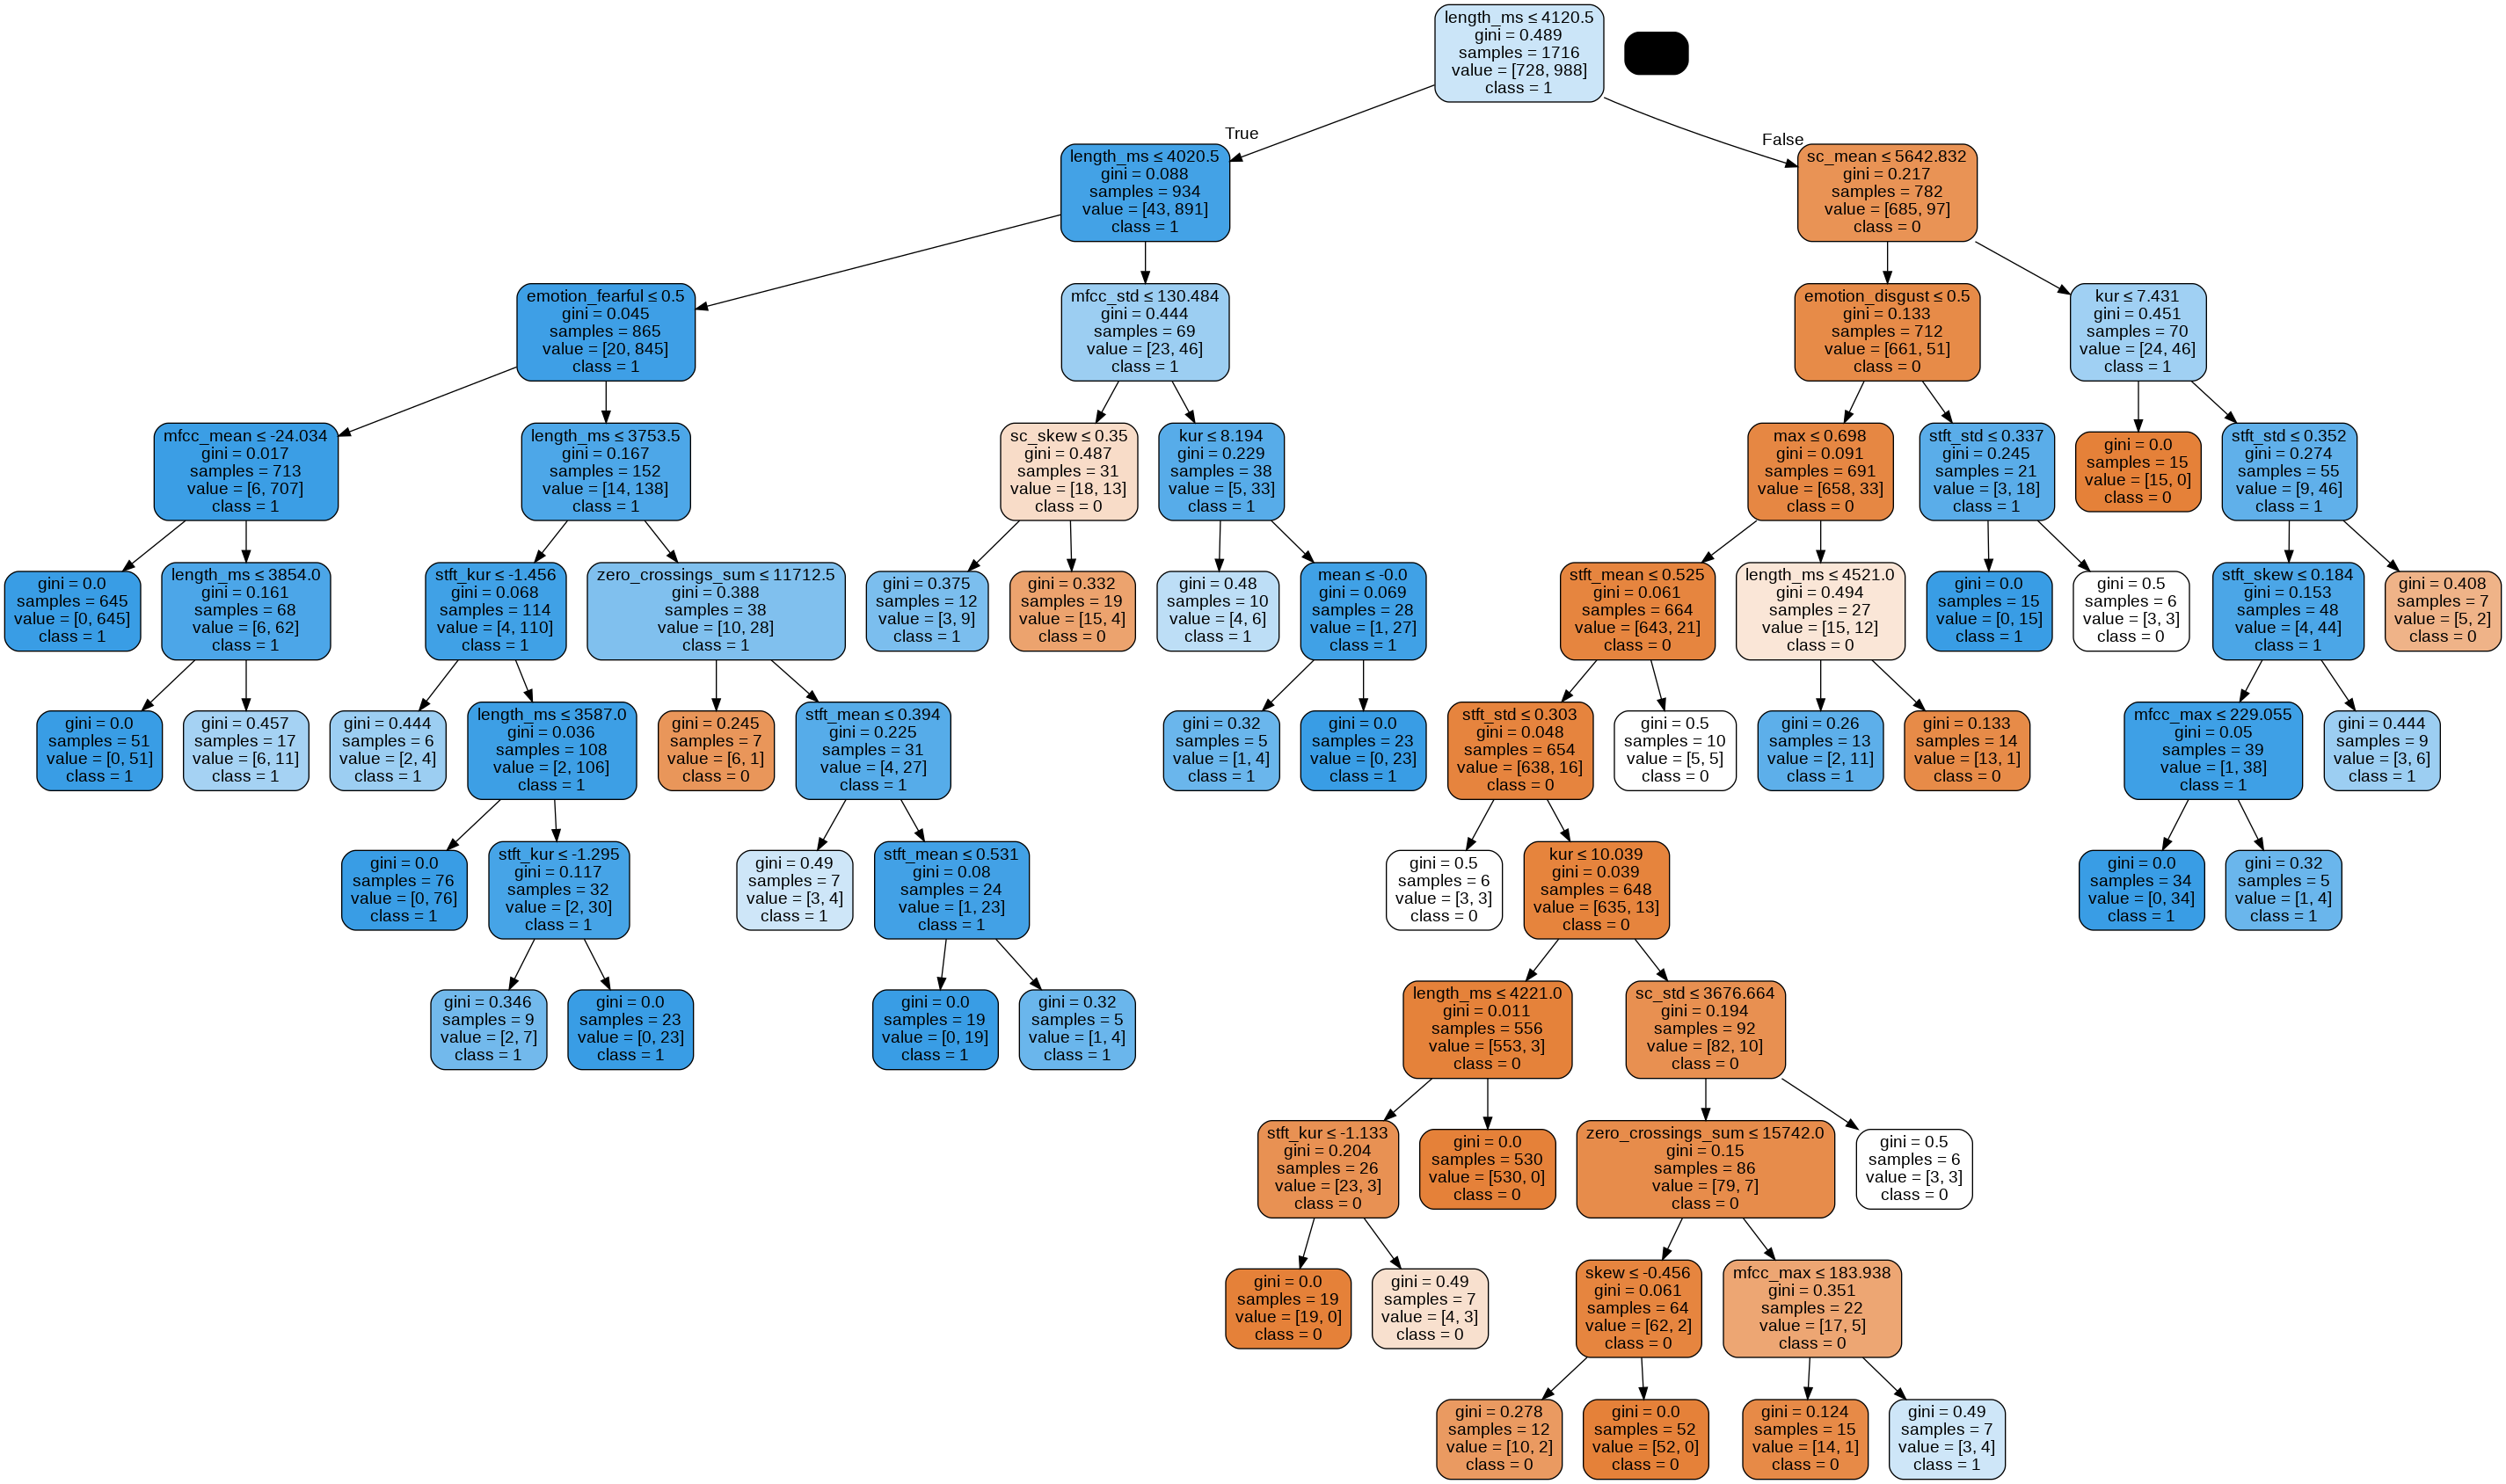

In [ ]:
%%time
dot_data = tree.export_graphviz (clf, out_file=None,
                                feature_names=attributes,
                                class_names=[str(v) for v in clf.classes_],
                                filled=True, rounded=True,
                                special_characters=True,
                                max_depth=100)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
y_pred = clf.predict(X_train)

In [ ]:
y_pred[:5]

array([1, 1, 1, 1, 1])

In [ ]:
y_train.values[:5]

array([1, 1, 1, 1, 1])

In [ ]:
print('Accuracy', accuracy_score(y_train, y_pred))
print('F1', f1_score(y_train, y_pred, average=None))

Accuracy 0.9656177156177156
F1 [0.95939436 0.97018696]


In [ ]:
print( classification_report(y_train, y_pred) )

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       728
           1       0.97      0.97      0.97       988

    accuracy                           0.97      1716
   macro avg       0.97      0.96      0.96      1716
weighted avg       0.97      0.97      0.97      1716



In [ ]:
cf = confusion_matrix(y_train, y_pred, labels=[1,0])
cf

array([[960,  28],
       [ 31, 697]])

In [ ]:
# TP, FN, FP, TN
cf[0][0], cf[0][1], cf[1][0], cf[1][1]

(960, 28, 31, 697)

In [ ]:
cf = confusion_matrix(y_train, y_pred, labels=[1,0], normalize='all')
cf

array([[0.55944056, 0.01631702],
       [0.01806527, 0.40617716]])

In [ ]:
y_pred = clf.predict( X_test )

In [ ]:
y_pred[:5]

array([1, 1, 1, 1, 1])

In [ ]:
y_score = clf.predict_proba(X_test)
y_score[:6]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [ ]:
y_score[:,1][:6]

array([1., 1., 1., 1., 1., 0.])

In [ ]:
fpr, tpr, th = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9835511056131127


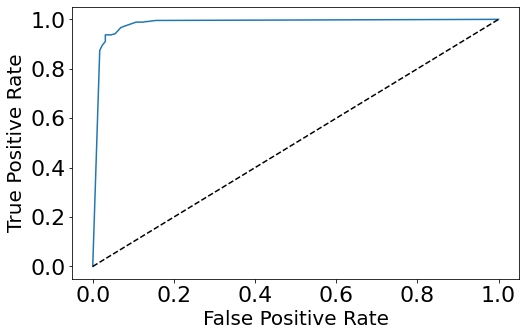

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

### Dummy Classifier

In [ ]:
dummy_clf = DummyClassifier(strategy='constant', constant=1)
dummy_clf.fit(X_test, y_test)

y_pred = dummy_clf.predict(X_test)

In [ ]:
cf = confusion_matrix(y_test, y_pred, labels=[1,0])
cf

array([[446,   0],
       [290,   0]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.61      1.00      0.75       446

    accuracy                           0.61       736
   macro avg       0.30      0.50      0.38       736
weighted avg       0.37      0.61      0.46       736



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
param_list = {'max_depth': [None] + [2, 3, 4],
             'min_samples_split': [2, 5, 10, 20],
             'min_samples_leaf': [1, 5, 10, 20]
             }

grid_search = GridSearchCV(clf, param_grid=param_list, scoring='f1',cv=5)
grid_search.fit(X, y)

res = grid_search.cv_results_

In [ ]:
res

{'mean_fit_time': array([0.06125655, 0.06561813, 0.05612483, 0.0671134 , 0.07647061,
        0.04730263, 0.05010924, 0.09537201, 0.04579601, 0.04614248,
        0.06262231, 0.04730234, 0.05146198, 0.04372954, 0.06967449,
        0.03772702, 0.01904707, 0.01983089, 0.01224475, 0.01276412,
        0.01240931, 0.01273985, 0.01219788, 0.01229615, 0.01311502,
        0.01231265, 0.01238661, 0.01392698, 0.01282339, 0.01292005,
        0.01221328, 0.01285105, 0.01730814, 0.01727886, 0.01857085,
        0.01784062, 0.01794858, 0.01821628, 0.01792159, 0.01752067,
        0.01756225, 0.01820536, 0.01709991, 0.01723356, 0.01753626,
        0.01693807, 0.01691437, 0.01837912, 0.02213793, 0.02288733,
        0.02187724, 0.02218995, 0.02271967, 0.02264562, 0.02429543,
        0.02380509, 0.02238417, 0.0228704 , 0.02293921, 0.02240477,
        0.02151127, 0.02147164, 0.02303152, 0.02408838]),
 'std_fit_time': array([1.37077326e-02, 1.31350628e-02, 6.71440639e-03, 1.28687156e-02,
        2.65317960e-0

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=10)

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report(res, n_top=3)

Model with rank: 1
Mean validation score: 0.952 (std: 0.007)
Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.951 (std: 0.007)
Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.951 (std: 0.007)
Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 20}



In [ ]:
scores = cross_val_score(clf, X, y, cv=10, scoring='f1')

scores.mean(), scores.std()

(0.9469654949048476, 0.0092162189437894)

### KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [ ]:
norm = StandardScaler()
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
clf.score(X_test_norm, y_test)

0.9239130434782609

In [ ]:
%%time
param_grid = {
    "n_neighbors":list(range(3,101,2)),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
}
grid = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    n_iter=150,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
)
grid.fit(X_train_norm, y_train)
clf = grid.best_estimator_

CPU times: user 5.52 s, sys: 568 ms, total: 6.09 s
Wall time: 2min 13s


In [ ]:
print(grid.best_params_, grid.best_score_)

{'weights': 'distance', 'n_neighbors': 21, 'metric': 'cityblock'} 0.9274510136280425


In [ ]:
clf.score(X_test_norm, y_test)

0.9334239130434783

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00160702, 0.0017583 , 0.00162308, 0.00153538, 0.00167423,
        0.00172321, 0.00159556, 0.00160832, 0.0015571 , 0.00189452,
        0.00164613, 0.00160071, 0.00153965, 0.00160352, 0.00172468,
        0.00170348, 0.00153869, 0.00174183, 0.00174966, 0.00168787,
        0.00152941, 0.00159151, 0.00191129, 0.00148244, 0.00151082,
        0.00149164, 0.0015772 , 0.00159466, 0.00151858, 0.00163286,
        0.00142749, 0.00142691, 0.00156219, 0.00161161, 0.00157029,
        0.00161803, 0.00157579, 0.00161879, 0.00152343, 0.00150065,
        0.00150893, 0.00161379, 0.00162346, 0.00155425, 0.00143488,
        0.00147859, 0.00159969, 0.00149577, 0.00164913, 0.00151585,
        0.00158301, 0.00153653, 0.00148658, 0.00153697, 0.0014984 ,
        0.00148843, 0.00164207, 0.00168899, 0.00169616, 0.00151294,
        0.00163238, 0.00150892, 0.00151348, 0.00153417, 0.0015127 ,
        0.00163122, 0.00152606, 0.00172494, 0.00148174, 0.00157332,
        0.00151472, 0.00151274,

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_metric,params,split0_test_score,split1_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001607,0.000345,0.029700,0.003041,distance,15,cityblock,"{'weights': 'distance', 'n_neighbors': 15, 'me...",0.912791,0.953353,...,0.932945,0.897959,0.936047,0.921283,0.918367,0.921283,0.927114,0.926517,0.015604,5
1,0.001758,0.001148,0.032570,0.002578,distance,63,cityblock,"{'weights': 'distance', 'n_neighbors': 63, 'me...",0.912791,0.935860,...,0.924198,0.900875,0.933140,0.927114,0.924198,0.924198,0.903790,0.921798,0.015364,29
2,0.001623,0.000313,0.043871,0.003629,uniform,49,cityblock,"{'weights': 'uniform', 'n_neighbors': 49, 'met...",0.904070,0.927114,...,0.924198,0.889213,0.918605,0.927114,0.921283,0.921283,0.906706,0.918534,0.014846,53
3,0.001535,0.000091,0.021935,0.003189,distance,59,euclidean,"{'weights': 'distance', 'n_neighbors': 59, 'me...",0.880814,0.900875,...,0.900875,0.871720,0.904070,0.903790,0.903790,0.892128,0.871720,0.894932,0.016849,112
4,0.001674,0.001037,0.031071,0.002353,distance,47,cityblock,"{'weights': 'distance', 'n_neighbors': 47, 'me...",0.912791,0.935860,...,0.927114,0.900875,0.924419,0.924198,0.921283,0.921283,0.918367,0.923719,0.014028,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.001737,0.001064,0.019105,0.001914,distance,25,euclidean,"{'weights': 'distance', 'n_neighbors': 25, 'me...",0.889535,0.927114,...,0.895044,0.903790,0.901163,0.897959,0.906706,0.915452,0.889213,0.906065,0.014622,93
146,0.001782,0.000945,0.037720,0.003364,uniform,3,cityblock,"{'weights': 'uniform', 'n_neighbors': 3, 'metr...",0.909884,0.930029,...,0.918367,0.918367,0.938953,0.930029,0.927114,0.921283,0.921283,0.920163,0.013766,43
147,0.001592,0.000670,0.035009,0.003895,distance,89,cityblock,"{'weights': 'distance', 'n_neighbors': 89, 'me...",0.898256,0.927114,...,0.915452,0.889213,0.930233,0.921283,0.915452,0.927114,0.906706,0.919582,0.015510,47
148,0.001719,0.000964,0.028572,0.000951,distance,27,cityblock,"{'weights': 'distance', 'n_neighbors': 27, 'me...",0.915698,0.953353,...,0.918367,0.903790,0.927326,0.909621,0.912536,0.924198,0.930029,0.922555,0.015065,20


In [ ]:
results["metric_weight"] = results["param_metric"] + " , " + results["param_weights"]

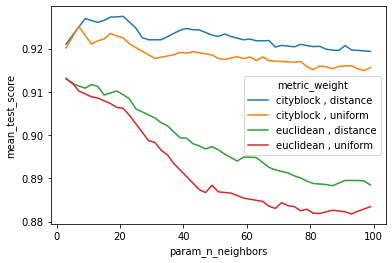

In [ ]:
sns.lineplot(
   data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
)

In [ ]:
%%time
param_grid = {
    "n_neighbors": 11,
    "weights": ["distance"],
    "metric": ["cityblock"],
}


grid = RandomizedSearchCV()
    KNeighborsClassifier(),
    param_distributions=param_grid,
    n_iter=150,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,

grid.fit(X_train_norm, y_train)
clf = grid.best_estimator_

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

In [ ]:
clf.score(X_test_norm, y_test)

###Naive Bayes

In [ ]:

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
clf = GaussianNB()

In [ ]:
%%time
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
clf.predict_proba(X_test)

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
#plot_roc(y_test, clf.predict_proba(X_test))
#plt.show()
#print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro")

fpr, tpr, th = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()